In [8]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Load the dataset
file_path = '/kaggle/input/advertising-dataset/advertising.csv'
data = pd.read_csv(file_path)

# Check for missing values
missing_values = data.isnull().sum()

# Split the dataset
X = data[['TV', 'Radio', 'Newspaper']]
y = data['Sales']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Missing values:", missing_values)
print("Training set size:", X_train.shape)
print("Testing set size:", X_test.shape)


Missing values: TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64
Training set size: (160, 3)
Testing set size: (40, 3)


In [9]:
# Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Use Random Forest to evaluate feature importance
model = RandomForestRegressor(random_state=42)
model.fit(X_train_scaled, y_train)

# Get feature importances
feature_importances = model.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances}).sort_values(by='Importance', ascending=False)

print("Feature importances:")
print(feature_importance_df)


Feature importances:
     Feature  Importance
0         TV    0.845355
1      Radio    0.136642
2  Newspaper    0.018003


In [10]:
# Train a Linear Regression model
regressor = LinearRegression()
regressor.fit(X_train_scaled, y_train)

# Predict
y_pred_train = regressor.predict(X_train_scaled)
y_pred_test = regressor.predict(X_test_scaled)

# Evaluate the model
train_rmse_lr = mean_squared_error(y_train, y_pred_train, squared=False)
test_rmse_lr = mean_squared_error(y_test, y_pred_test, squared=False)
train_r2_lr = r2_score(y_train, y_pred_train)
test_r2_lr = r2_score(y_test, y_pred_test)

print("Linear Regression:")
print("Train RMSE:", train_rmse_lr)
print("Test RMSE:", test_rmse_lr)
print("Train R2:", train_r2_lr)
print("Test R2:", test_r2_lr)


Linear Regression:
Train RMSE: 1.6358920055378559
Test RMSE: 1.7052146229349234
Train R2: 0.9001416005862131
Test R2: 0.9059011844150825


In [11]:
# Train a Decision Tree Regressor model
tree_regressor = DecisionTreeRegressor(random_state=42)
tree_regressor.fit(X_train_scaled, y_train)

# Predict
y_pred_train_tree = tree_regressor.predict(X_train_scaled)
y_pred_test_tree = tree_regressor.predict(X_test_scaled)

# Evaluate the model
train_rmse_tree = mean_squared_error(y_train, y_pred_train_tree, squared=False)
test_rmse_tree = mean_squared_error(y_test, y_pred_test_tree, squared=False)
train_r2_tree = r2_score(y_train, y_pred_train_tree)
test_r2_tree = r2_score(y_test, y_pred_test_tree)

print("Decision Tree Regressor:")
print("Train RMSE:", train_rmse_tree)
print("Test RMSE:", test_rmse_tree)
print("Train R2:", train_r2_tree)
print("Test R2:", test_r2_tree)


Decision Tree Regressor:
Train RMSE: 0.0
Test RMSE: 1.8444511378727275
Train R2: 1.0
Test R2: 0.8899068317956319


In [12]:
# Train a Random Forest Regressor model
forest_regressor = RandomForestRegressor(random_state=42)
forest_regressor.fit(X_train_scaled, y_train)

# Predict
y_pred_train_forest = forest_regressor.predict(X_train_scaled)
y_pred_test_forest = forest_regressor.predict(X_test_scaled)

# Evaluate the model
train_rmse_forest = mean_squared_error(y_train, y_pred_train_forest, squared=False)
test_rmse_forest = mean_squared_error(y_test, y_pred_test_forest, squared=False)
train_r2_forest = r2_score(y_train, y_pred_train_forest)
test_r2_forest = r2_score(y_test, y_pred_test_forest)

print("Random Forest Regressor:")
print("Train RMSE:", train_rmse_forest)
print("Test RMSE:", test_rmse_forest)
print("Train R2:", train_r2_forest)
print("Test R2:", test_r2_forest)


Random Forest Regressor:
Train RMSE: 0.4822199381506305
Test RMSE: 1.1986824224956336
Train R2: 0.9913230785367413
Test R2: 0.9535019934565436


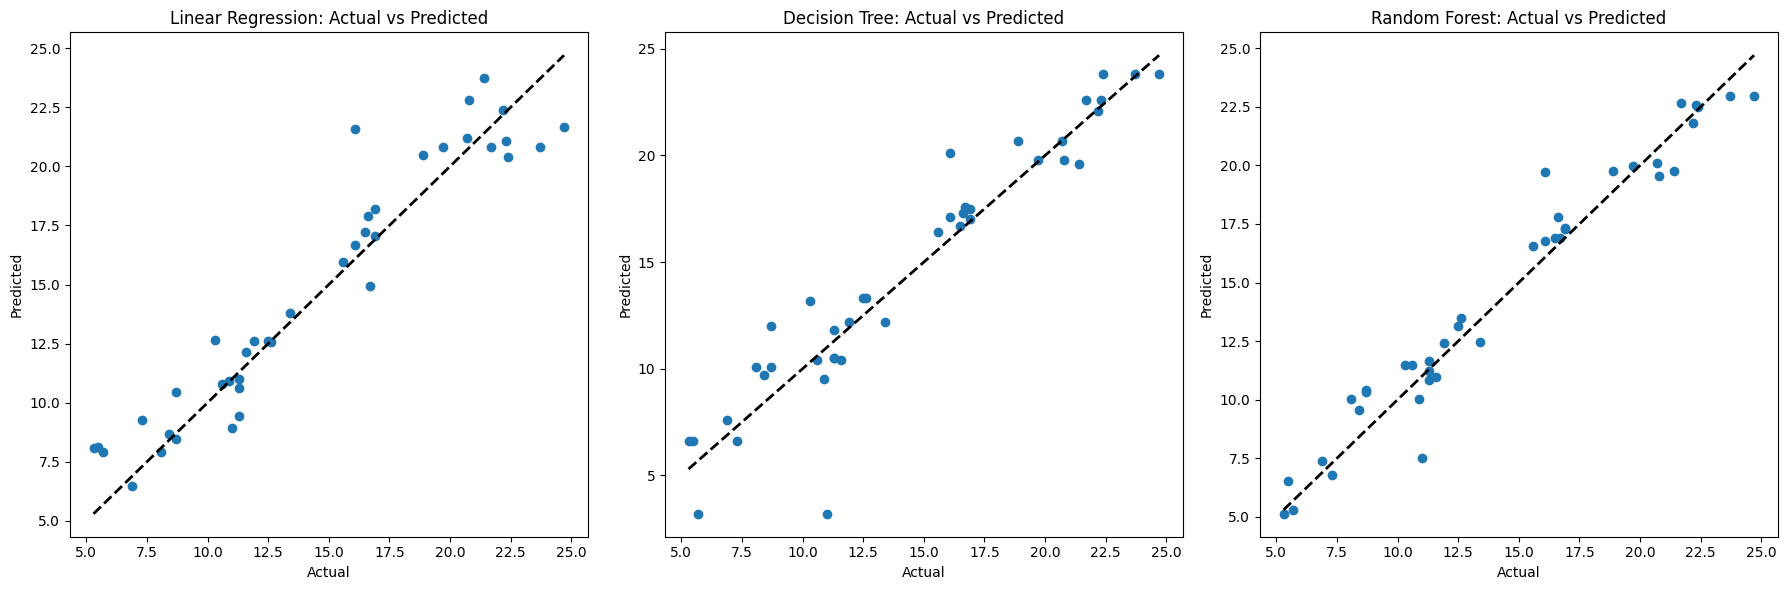

In [13]:
# Visualization
plt.figure(figsize=(18, 6))

# Linear Regression
plt.subplot(1, 3, 1)
plt.scatter(y_test, y_pred_test)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Linear Regression: Actual vs Predicted')

# Decision Tree Regressor
plt.subplot(1, 3, 2)
plt.scatter(y_test, y_pred_test_tree)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Decision Tree: Actual vs Predicted')

# Random Forest Regressor
plt.subplot(1, 3, 3)
plt.scatter(y_test, y_pred_test_forest)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Random Forest: Actual vs Predicted')

plt.tight_layout()
plt.show()


In [14]:
# Summary
performance_summary = {
    'Model': ['Linear Regression', 'Decision Tree', 'Random Forest'],
    'Train RMSE': [train_rmse_lr, train_rmse_tree, train_rmse_forest],
    'Test RMSE': [test_rmse_lr, test_rmse_tree, test_rmse_forest],
    'Train R2': [train_r2_lr, train_r2_tree, train_r2_forest],
    'Test R2': [test_r2_lr, test_r2_tree, test_r2_forest]
}

performance_df = pd.DataFrame(performance_summary)

print("Model performance comparison:")
print(performance_df)

Model performance comparison:
               Model  Train RMSE  Test RMSE  Train R2   Test R2
0  Linear Regression    1.635892   1.705215  0.900142  0.905901
1      Decision Tree    0.000000   1.844451  1.000000  0.889907
2      Random Forest    0.482220   1.198682  0.991323  0.953502
